# **Bottle Deep Learning Version**

**Benedictus Bayu Pramudhito**

**Batch size = 64**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
print('\n'.join(os.listdir(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)')))

bottle.csv
References
Untitled0.ipynb
Week_1_Python_1.ipynb
heart.csv
pima-indians-diabetes.csv
sonar.csv
housing.csv
winequality-white.csv
auto.csv
sales.csv
birth.csv
shampoo.csv
daily-min-temperatures.csv
Quiz
customer.csv
iris.csv
iris (1).csv
Bootcamp Images
parkinsons
numbers_dataset
bottle-updated.csv
auto-mpg.csv
auto (1).csv


In [ ]:
df = pd.read_csv(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)/bottle-updated.csv')
df.head()

,Unnamed: 0,Depthm,T_degC,Salnty
0,0,0,10.50,33.440
1,1,8,10.46,33.440
2,2,10,10.46,33.437
3,3,19,10.45,33.420
4,4,20,10.45,33.421


In [ ]:
df.shape

(864863, 4)

In [ ]:
df.dtypes

Unnamed: 0      int64
Depthm          int64
T_degC        float64
Salnty        float64
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,864863.0,432431.000000,249664.587267,0.000,216215.500,432431.000,648646.5000,864862.000
Depthm,864863.0,226.831951,316.050259,0.000,46.000,125.000,300.0000,5351.000
T_degC,853900.0,10.799677,4.243825,1.440,7.680,10.060,13.8800,31.140
Salnty,817509.0,33.840350,0.461843,28.431,33.488,33.863,34.1969,37.034


In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.head()

,Depthm,T_degC,Salnty
0,0,10.50,33.440
1,8,10.46,33.440
2,10,10.46,33.437
3,19,10.45,33.420
4,20,10.45,33.421


In [ ]:
print(df.dtypes)
df.shape

Depthm      int64
T_degC    float64
Salnty    float64
dtype: object


(864863, 3)

In [ ]:
nulls = df.isnull().sum().sort_values(ascending=False)
percent = round(nulls/len(df)*100, 2)

df_null = pd.DataFrame(columns=['Features', 'Total', 'Percent'])
df_null['Features'] = nulls.index
df_null['Total'] = nulls.values
df_null['Percent'] = percent.values

df_null

,Features,Total,Percent
0,Salnty,47354,5.48
1,T_degC,10963,1.27
2,Depthm,0,0.00


In [ ]:
#Isi missing values
for i in df.columns:
  if df[i].isnull().sum() > 0:
    df[i].fillna(df[i].mode().mean(), inplace=True)
    print('Filled', i)

Filled T_degC
Filled Salnty


In [ ]:
#Cek ulang missing valuesnya
nulls = df.isnull().sum().sort_values(ascending=False)
percent = round(nulls/len(df)*100, 2)

df_null = pd.DataFrame(columns=['Features', 'Total', 'Percent'])
df_null['Features'] = nulls.index
df_null['Total'] = nulls.values
df_null['Percent'] = percent.values

df_null

,Features,Total,Percent
0,Salnty,0,0.0
1,T_degC,0,0.0
2,Depthm,0,0.0


In [ ]:
df.dtypes

Depthm      int64
T_degC    float64
Salnty    float64
dtype: object

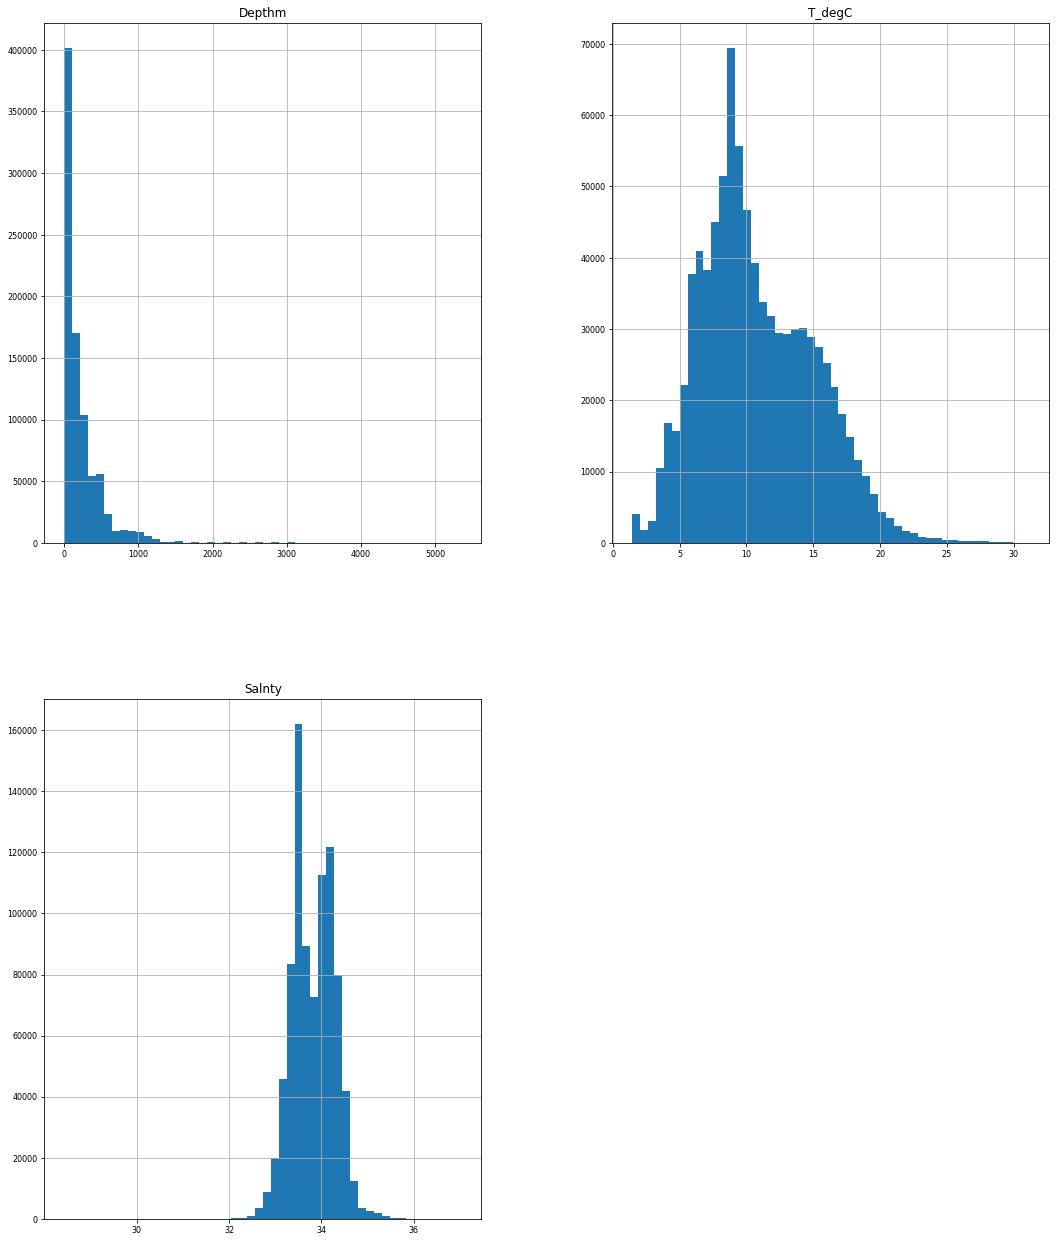

In [ ]:
df_numbers = df.select_dtypes(include=['float64', 'int64'])

df_numbers.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

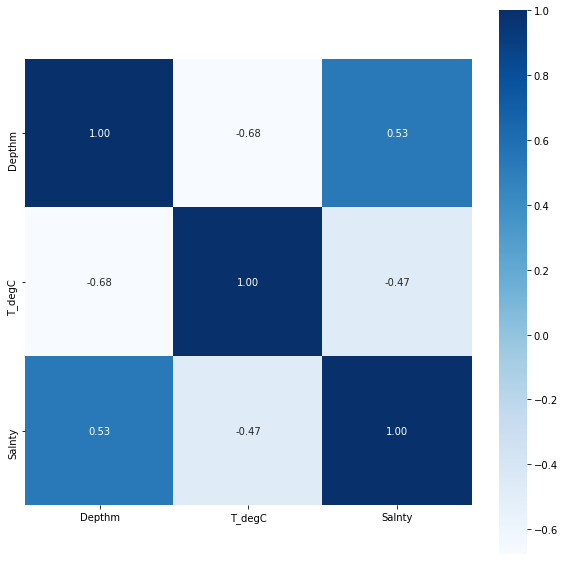

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':10}, cbar=True, square=True, fmt='.2f', cmap='Blues')
plt.show()

## **Machine Learning Model**

### **Linear Regression**

**Feature Engineering**

In [ ]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
X = df.drop(['Salnty'], axis=1)
y = df['Salnty']

In [ ]:
stdr = StandardScaler()

X = stdr.fit_transform(X.values)
y = stdr.fit_transform(df['Salnty'].values.reshape(-1, 1)).flatten()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((648647, 2), (216216, 2), (648647,), (216216,))

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

predict_lm = linreg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, predict_lm)
mae = mean_absolute_error(y_test, predict_lm)
r2 = r2_score(y_test, predict_lm)
print("MSE (Mean Squared Error)       :", mse)
print("MAE (Mean Absolute Error)      :", mae)
print("r^2 score                      :", r2)
print('RMSE (Root Mean Squared Error  :', np.sqrt(mean_squared_error(y_test, predict_lm)))

MSE (Mean Squared Error)       : 0.7004045653886645
MAE (Mean Absolute Error)      : 0.6007392481489782
r^2 score                      : 0.3013722059652524
RMSE (Root Mean Squared Error  : 0.8369017656742423


## **Deep Learning Model**

In [ ]:
def plot_loss_new(history):
  history_df = pd.DataFrame(history.history)

  min_loss_index = history_df[history_df['loss']==min(history_df['loss'])].index.values
  min_loss = history_df.loc[min_loss_index]['loss']
  min_val_loss_index = history_df[history_df['val_loss']==min(history_df['val_loss'])].index.values
  min_val_loss = history_df.loc[min_val_loss_index]['val_loss']

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.plot(min_loss_index, min_loss, 'o', c='k', ms=4, label='min loss')
  plt.plot(min_val_loss_index, min_val_loss, 'o', c='k', ms=4, label='min val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  plt.show()

  print('Minimum Loss             :', min_loss)
  print()
  print('Minimum Validation Loss  :', min_val_loss)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(13, input_dim=2, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)

Epoch 1/50
10136/10136 [==============================] - 10s 1ms/step - loss: 0.4319 - val_loss: 0.4117
Epoch 2/50
10136/10136 [==============================] - 10s 986us/step - loss: 0.4041 - val_loss: 0.4060
Epoch 3/50
10136/10136 [==============================] - 10s 984us/step - loss: 0.4014 - val_loss: 0.4041
Epoch 4/50
10136/10136 [==============================] - 10s 975us/step - loss: 0.4006 - val_loss: 0.4039
Epoch 5/50
10136/10136 [==============================] - 10s 982us/step - loss: 0.4004 - val_loss: 0.4032
Epoch 6/50
10136/10136 [==============================] - 10s 970us/step - loss: 0.4001 - val_loss: 0.4032
Epoch 7/50
10136/10136 [==============================] - 10s 959us/step - loss: 0.3999 - val_loss: 0.4030
Epoch 8/50
10136/10136 [==============================] - 10s 963us/step - loss: 0.3997 - val_loss: 0.4036
Epoch 9/50
10136/10136 [==============================] - 10s 984us/step - loss: 0.3996 - val_loss: 0.4026
Epoch 10/50
10136/10136 [==============

In [ ]:
predict_dl = model.predict(X_test)
predict_dl = predict_dl.flatten()

In [ ]:
mse = mean_squared_error(y_test, predict_dl)
mae = mean_absolute_error(y_test, predict_dl)
r2 = r2_score(y_test, predict_dl)
print("MSE (Mean Squared Error)       :", mse)
print("MAE (Mean Absolute Error)      :", mae)
print("r^2 score                      :", r2)
print('RMSE (Root Mean Squared Error) :', np.sqrt(mean_squared_error(y_test, predict_dl)))

MSE (Mean Squared Error)       : 0.40102307799146486
MAE (Mean Absolute Error)      : 0.43223807444115186
r^2 score                      : 0.5999942287944202
RMSE (Root Mean Squared Error) : 0.6332638296882784


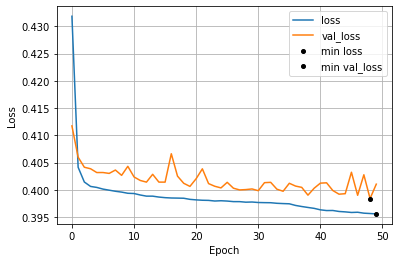

Minimum Loss             : 49    0.395556
Name: loss, dtype: float64

Minimum Validation Loss  : 48    0.398377
Name: val_loss, dtype: float64


In [ ]:
plot_loss_new(history)

Sweet spot berada pada epoch 48 dengan val_loss 0.398377

## **Deep Learning with Deeper Model**

In [ ]:
deeper = Sequential()
deeper.add(Dense(13, input_dim=2, kernel_initializer='normal', activation='relu'))
deeper.add(Dense(6, kernel_initializer='normal', activation='relu'))
deeper.add(Dense(1, kernel_initializer='normal'))

deeper.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
deeper.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                39        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 84        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 130
Trainable params: 130
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = deeper.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)

Epoch 1/50
10136/10136 [==============================] - 11s 1ms/step - loss: 0.3955 - val_loss: 0.3756
Epoch 2/50
10136/10136 [==============================] - 11s 1ms/step - loss: 0.3680 - val_loss: 0.3724
Epoch 3/50
10136/10136 [==============================] - 11s 1ms/step - loss: 0.3662 - val_loss: 0.3703
Epoch 4/50
10136/10136 [==============================] - 11s 1ms/step - loss: 0.3648 - val_loss: 0.3689
Epoch 5/50
10136/10136 [==============================] - 11s 1ms/step - loss: 0.3642 - val_loss: 0.3679
Epoch 6/50
10136/10136 [==============================] - 11s 1ms/step - loss: 0.3638 - val_loss: 0.3707
Epoch 7/50
10136/10136 [==============================] - 11s 1ms/step - loss: 0.3637 - val_loss: 0.3672
Epoch 8/50
10136/10136 [==============================] - 11s 1ms/step - loss: 0.3636 - val_loss: 0.3674
Epoch 9/50
10136/10136 [==============================] - 11s 1ms/step - loss: 0.3635 - val_loss: 0.3687
Epoch 10/50
10136/10136 [==============================

In [ ]:
predict_deep = deeper.predict(X_test)
predict_deep = predict_deep.flatten()

In [ ]:
mse = mean_squared_error(y_test, predict_deep)
mae = mean_absolute_error(y_test, predict_deep)
r2 = r2_score(y_test, predict_deep)
print("MSE (Mean Squared Error)         :", mse)
print("MAE (Mean Absolute Error)        :", mae)
print("r^2 score                        :", r2)
print('RMSE (Root Mean Squared Error)   :', np.sqrt(mean_squared_error(y_test, predict_deep)))

MSE (Mean Squared Error)         : 0.36618219330850194
MAE (Mean Absolute Error)        : 0.3972444067030315
r^2 score                        : 0.6347467298646701
RMSE (Root Mean Squared Error)   : 0.6051298978802006


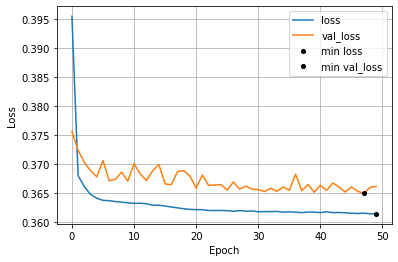

Minimum Loss             : 49    0.361458
Name: loss, dtype: float64

Minimum Validation Loss  : 47    0.365
Name: val_loss, dtype: float64


In [ ]:
plot_loss_new(history1)

Sweet spot berada pada epoch 47 dengan val_loss 0.365

## **Deep Learning with Wider Model**

In [ ]:
wider = Sequential()
wider.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider.add(Dense(1, kernel_initializer='normal'))

wider.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
wider.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = wider.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)

Epoch 1/50
10136/10136 [==============================] - 10s 983us/step - loss: 0.4281 - val_loss: 0.4115
Epoch 2/50
10136/10136 [==============================] - 10s 1ms/step - loss: 0.4039 - val_loss: 0.4052
Epoch 3/50
10136/10136 [==============================] - 10s 961us/step - loss: 0.4015 - val_loss: 0.4048
Epoch 4/50
10136/10136 [==============================] - 10s 959us/step - loss: 0.4008 - val_loss: 0.4034
Epoch 5/50
10136/10136 [==============================] - 10s 974us/step - loss: 0.4005 - val_loss: 0.4045
Epoch 6/50
10136/10136 [==============================] - 10s 973us/step - loss: 0.4002 - val_loss: 0.4044
Epoch 7/50
10136/10136 [==============================] - 10s 984us/step - loss: 0.3997 - val_loss: 0.4028
Epoch 8/50
10136/10136 [==============================] - 10s 970us/step - loss: 0.3867 - val_loss: 0.3825
Epoch 9/50
10136/10136 [==============================] - 10s 976us/step - loss: 0.3770 - val_loss: 0.3800
Epoch 10/50
10136/10136 [==============

In [ ]:
predict_wide = wider.predict(X_test)
predict_wide = predict_wide.flatten()

In [ ]:
mse = mean_squared_error(y_test, predict_wide)
mae = mean_absolute_error(y_test, predict_wide)
r2 = r2_score(y_test, predict_wide)
print("MSE (Mean Squared Error)       :", mse)
print("MAE (Mean Absolute Error)      :", mae)
print("r^2 score                      :", r2)
print('RMSE (Root Mean Squared Error  :', np.sqrt(mean_squared_error(y_test, predict_wide)))

MSE (Mean Squared Error)       : 0.374989494495312
MAE (Mean Absolute Error)      : 0.41090662107283454
r^2 score                      : 0.6259617708515512
RMSE (Root Mean Squared Error  : 0.6123638579270596


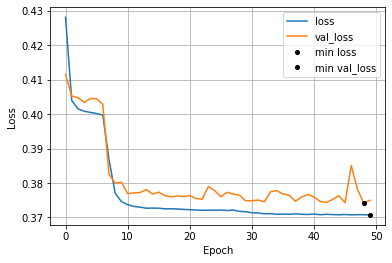

Minimum Loss             : 49    0.370745
Name: loss, dtype: float64

Minimum Validation Loss  : 48    0.374211
Name: val_loss, dtype: float64


In [ ]:
plot_loss_new(history2)

Sweet spot berada pada epoch 48 dengan val_loss 0.374211

## **Deep Learning Wider Model with SGD Optimizer**

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
wider1 = Sequential()
wider1.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider1.add(Dense(1, kernel_initializer='normal'))

opt = SGD(learning_rate=0.001, momentum=0.9)

wider1.compile(loss='mean_squared_error', optimizer=opt)

wider1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history3 = wider1.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)

Epoch 1/50
10136/10136 [==============================] - 10s 1ms/step - loss: 0.4499 - val_loss: 0.4028
Epoch 2/50
10136/10136 [==============================] - 10s 1ms/step - loss: 0.3947 - val_loss: 0.3947
Epoch 3/50
10136/10136 [==============================] - 10s 1ms/step - loss: 0.3881 - val_loss: 0.3884
Epoch 4/50
10136/10136 [==============================] - 10s 1ms/step - loss: 0.3825 - val_loss: 0.3833
Epoch 5/50
10136/10136 [==============================] - 10s 1ms/step - loss: 0.3783 - val_loss: 0.3807
Epoch 6/50
10136/10136 [==============================] - 10s 1ms/step - loss: 0.3759 - val_loss: 0.3801
Epoch 7/50
10136/10136 [==============================] - 10s 1ms/step - loss: 0.3746 - val_loss: 0.3778
Epoch 8/50
10136/10136 [==============================] - 10s 1ms/step - loss: 0.3741 - val_loss: 0.3770
Epoch 9/50
10136/10136 [==============================] - 10s 1ms/step - loss: 0.3739 - val_loss: 0.3785
Epoch 10/50
10136/10136 [==============================

In [ ]:
predict_sgd = wider1.predict(X_test)
predict_sgd = predict_sgd.flatten()

In [ ]:
mse = mean_squared_error(y_test, predict_sgd)
mae = mean_absolute_error(y_test, predict_sgd)
r2 = r2_score(y_test, predict_sgd)
print("MSE (Mean Squared Error)       :", mse)
print("MAE (Mean Absolute Error)      :", mae)
print("r^2 score                      :", r2)
print('RMSE (Root Mean Squared Error  :', np.sqrt(mean_squared_error(y_test, predict_sgd)))

MSE (Mean Squared Error)       : 0.37496722285418405
MAE (Mean Absolute Error)      : 0.4136234403312242
r^2 score                      : 0.6259839859944554
RMSE (Root Mean Squared Error  : 0.6123456726834804


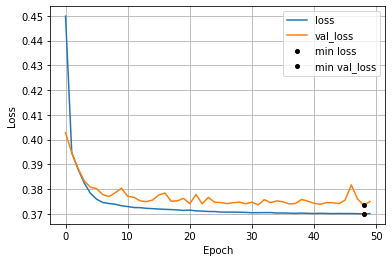

Minimum Loss             : 48    0.369948
Name: loss, dtype: float64

Minimum Validation Loss  : 48    0.373457
Name: val_loss, dtype: float64


In [ ]:
plot_loss_new(history3)

Sweet spot berada pada epoch 48 dengan val_loss 0.373457

## **Deep Learning Wider Model with RMSprop Optimizer**

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
wider2 = Sequential()
wider2.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider2.add(Dense(1, kernel_initializer='normal'))

opt = RMSprop(learning_rate=0.001, momentum=0.9)

wider2.compile(loss='mean_squared_error', optimizer=opt)

wider2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history4 = wider2.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)

Epoch 1/50
10136/10136 [==============================] - 10s 1ms/step - loss: 0.4037 - val_loss: 0.4365
Epoch 2/50
10136/10136 [==============================] - 11s 1ms/step - loss: 0.3853 - val_loss: 0.3898
Epoch 3/50
10136/10136 [==============================] - 10s 1ms/step - loss: 0.3808 - val_loss: 0.3834
Epoch 4/50
10136/10136 [==============================] - 10s 1ms/step - loss: 0.3782 - val_loss: 0.3765
Epoch 5/50
10136/10136 [==============================] - 11s 1ms/step - loss: 0.3771 - val_loss: 0.3833
Epoch 6/50
10136/10136 [==============================] - 10s 1ms/step - loss: 0.3768 - val_loss: 0.3805
Epoch 7/50
10136/10136 [==============================] - 11s 1ms/step - loss: 0.3763 - val_loss: 0.3955
Epoch 8/50
10136/10136 [==============================] - 10s 1ms/step - loss: 0.3757 - val_loss: 0.3747
Epoch 9/50
10136/10136 [==============================] - 10s 1ms/step - loss: 0.3758 - val_loss: 0.3794
Epoch 10/50
10136/10136 [==============================

In [ ]:
predict_rms = wider2.predict(X_test)
predict_rms = predict_rms.flatten()

In [ ]:
mse = mean_squared_error(y_test, predict_rms)
mae = mean_absolute_error(y_test, predict_rms)
r2 = r2_score(y_test, predict_rms)
print("MSE (Mean Squared Error)       :", mse)
print("MAE (Mean Absolute Error)      :", mae)
print("r^2 score                      :", r2)
print('RMSE (Root Mean Squared Error  :', np.sqrt(mean_squared_error(y_test, predict_rms)))

MSE (Mean Squared Error)       : 0.3718815985496072
MAE (Mean Absolute Error)      : 0.4111507776368915
r^2 score                      : 0.6290617827531477
RMSE (Root Mean Squared Error  : 0.6098209561417246


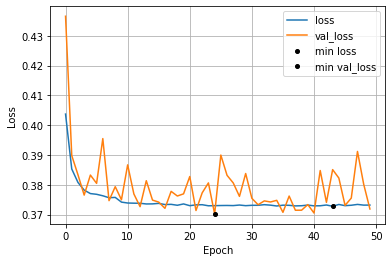

Minimum Loss             : 43    0.372795
Name: loss, dtype: float64

Minimum Validation Loss  : 24    0.370232
Name: val_loss, dtype: float64


In [ ]:
plot_loss_new(history4)

Sweet spot berada pada epoch 24 dengan val_loss 0.370232

## **Kesimpulan**

Dengan versi batch size 64 ini diperoleh

1. R2 score model Linear Regression            : 0.3013722059652524
2. R2 score Deep Learning Model Baseline Layer : 0.5999942287944202
3. R2 score Deep Learning Model Deeper Layer   : 0.6347467298646701
4. R2 score Deep Learning Model Wider Layer   : 0.6259617708515512
5. R2 score Deep Learning Model Wider Layer SGD Optimizer   : 0.6259839859944554
6. R2 score Deep Learning Model Wider Layer RMSprop Optimizer : 0.6290617827531477

Model terbaik adalah model Deep Learning dengan Deeper Layer dan Optimizer Adam walaupun nilai r2 scorenya masih berada di angka 0.63. Dengan penambahan batch size menjadi 64 membuat proses training menjadi lebih cepat dibanding batch size 8 namun masih lebih lambat dibanding batch size 128. Namun tidak menjamin hasilnya lebih baik karena seperti terlihat bahwa hasilnya pun masih berada diangka 0.63, tidak berbeda dengan batch size 8 dan batch size 128. Mungkin dengan penambahan feature bisa meningkatkan nilai r2 scorenya.